## 딥러닝 모델은 레고 사람 한 명이다.

## Model(모델)

In [2]:
from keras.models import Sequential
model = Sequential()

## Network (네트워크)
- 
- ### Network의 종류
    - #### VGG16 (528 MB, 23)
    - #### VGG19 (549 MB, 26)
    - #### ResNet50 (99 MB, 168)
    - #### DenseNet121 (33 MB, 121)
    - #### DenseNet169 (57 MB, 169)


## Objective Function (목표함수)
- 
- ### Objective Function의 종류
    - #### mean_squared_error
    - #### categorical_crossentropy
    - #### binary_crossentropy
    - #### squared_hinge
    - #### hinge

## Optimizer (최적화기)
-
- ### Optimizer의 종류
    - #### SGD
    - #### RMSprop
    - #### Adagrad
    - #### Adam
    - #### Adamax

### c.f. 엔진과 인터페이스
- #### 엔진: 딥러닝 엔진이란 모델 아키텍쳐가 구현한, 실제로 구동되는 시스템 (ex: 텐서플로우(엔진))
- #### 인터페이스: 엔진을 조정하기 위해 손쉽게 만들어진 함수 등 (ex: 케라스(핸들, 브레이크))

In [3]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras
import numpy as np

## 1. 데이터셋 생성하기

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
    # mnist: 숫자 손글씨 셋, ndarray 4개로 된 튜플
    # x는 이미지, y는 숫자를 준다
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
    # 1byte = 8bit = 0 ~ 255 나타낼 수 있다
    # 28 X 28 의 이미지 크기 (28 * 28 == 784) 
    # 1 Sample == 784 byte, 60,000 개의 Sample
    # 255.0로 나누면 모든 픽셀이 0.0 ~ 1.0 사이의 수가 된다
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
    # 1은 0100000000, 7은 0000000100 로 바뀐다 (One-Hot-Encoding)
    # 10 byte로 늘어난다. (전체는 60 만 byte)
y_test = np_utils.to_categorical(y_test)

# 검증셋 생성
x_val = x_train[50000:60000]
y_val = y_train[50000:60000]

# 검증셋이 분리된 테스트셋 생성
x_train = x_train[0:50000]
y_train = y_train[0:50000]

## 1.1. 학습 과정 이야기

### Batch Size (배치 사이즈)
- #### 몇 문항 풀고 업데이트할 것이냐
- #### Batch Size 만큼 비교한 후 Optimizer가 Network를 갱신한다 (가중치 갱신)

### Epoch (에포크)
- #### 반복 횟수
- #### 같은 테스트셋이라도 반복 학습하면 학습이 일어난다
- #### 반복 횟수가 늘어나면 오버피팅이 일어난다 (외우면서 푸는 경지)

## 1.2. 데이터셋 이야기

### 훈련셋
- #### 모델을 학습시키는 용도
- #### Unseen Data 를 예측하기 위한 학습

### 검증셋
- #### 매 Epoch마다 검증하는 셋
- #### 학습이 일어나는 셋이 아님 
- #### Epoch를 과도하게 설정할 경우 Overfitting이 일어날 수 있다.
- #### 검증셋이 있다면 학습 중단 시점을 정할 수 있다. (Overfitting 방지)

### 테스트셋
- #### 모델의 성능을 테스트하는 셋

## 2. 모델 구성하기

In [5]:
model = Sequential()                                                                                                                                  
    # 'Sequential'이라는 생성자로 모델을 하나 생성했다
model.add(Dense(units=64, input_dim=28*28, activation='relu'))    # 입력층
model.add(Dense(units=10, activation='softmax'))    
    # 출력층: 벡터가 10(클래스가 10 개: 0 ~ 9) 
    # 다중 클래스 분류에 적합한 Activation Function이 softmax

## c.f. ___activation='softmax'___
- ### 시그모이드는 0 ~ 1 의 하나의 벡터가 나오는 Activation Function 
- ### 소프트맥스는 3 개의 벡터를 생성하고 3 칸(3 개의 벡터)의 합이 1 되게 하는 Activation Function
- ### 벡터 별로 따로 따로 비교해서 loss를 계산하는 Objective Function이 Catagorical_Crossentropy

## 3. 모델 학습과정 설정하기

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 4. 모델 학습시키기

In [7]:
tb_hist = keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
hist = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))       
    # 총 300,000 개의 데이터를 학습 (60,000 * 5: sample * epoch)
    # 60,000 개 데이터 중 32개씩 나눠서 네트워크 갱신(가중치 갱신)
    # 32 마다 올라간다
    
    # val_loss 가 점점 줄어들기 때문에 더 학습할 필요가 있다(underfitting 상태) => epoch를 늘린다

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7253 - accuracy: 0.8157 - val_loss: 0.3700 - val_accuracy: 0.9022
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3654 - accuracy: 0.8978 - val_loss: 0.3028 - val_accuracy: 0.9180
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3133 - accuracy: 0.9121 - val_loss: 0.2712 - val_accuracy: 0.9255
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2830 - accuracy: 0.9203 - val_loss: 0.2520 - val_accuracy: 0.9293
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2615 - accuracy: 0.9268 - val_loss: 0.2352 - val_accuracy: 0.9344
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2444 - accuracy: 0.9313 - val_loss: 0.2230 - val_accuracy: 0.9371
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2294 - accuracy: 0.9347 - val_loss: 0.2124 - val_accuracy:

In [8]:
hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val), callbacks=[tb_hist])       

# epochs 를 20번으로 늘렸는데도 val_loss 가 올라가지 않았다(아직 underfitting) => 더 훈련시켜야한다

Epoch 1/5
   1/1563 [..............................] - ETA: 0s - loss: 0.1567 - accuracy: 0.9688WARNING:tensorflow:From C:\Users\rangs\anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1855 - accuracy: 0.9471 - val_loss: 0.1782 - val_accuracy: 0.9517
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1770 - accuracy: 0.9494 - val_loss: 0.1726 - val_accuracy: 0.9539
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1695 - accuracy: 0.9521 - val_loss: 0.1674 - val_accuracy: 0.9541
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1623 - accuracy: 0.9539 - val_loss: 0.1620 - val_accuracy: 0.9566
Epoch 5/5
1563/1563 [==============================] - 5s 3m

## 5. 학습과정 살펴보기

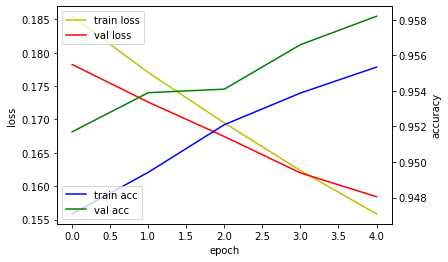

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

## 6. 모델 평가하기

In [10]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
    # 학습하지 않은 Test Set으로 평가
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 1s 2ms/step - loss: 0.1590 - accuracy: 0.9543
## evaluation loss and_metrics ##
[0.15901309251785278, 0.9542999863624573]


## 7. 모델 사용하기

In [11]:
xhat = x_test[0:1]
    # 임의의 Sample
yhat = model.predict(xhat)
    # 
print('## yhat ##')
print(yhat)
    # 나오는 10개의 벡터를 Output으로 출력해준다
    # 7이라고 대답한 것이다
yhat = model.predict_classes(xhat)
    # 벡터로 알려주지 않고 클래스로 알려주는 Method
print('## yhat ##')
print(yhat)

## yhat ##
[[4.1515475e-05 2.1266130e-08 1.0743405e-03 3.6680722e-03 1.2504563e-06
  2.1075146e-05 4.6349555e-09 9.9504071e-01 3.2799471e-05 1.2011125e-04]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
## yhat ##
[7]


### ___Q.___ png파일에서 투명한 부분은 픽셀에서 어떤 값을 가지나요?
### ___A.___ 
- #### 흑백은 채널이 하나. 컬러는 3개 채널이 있다 (R, G, B)
- #### 투명 같은 경우는 ___a___ 채널(알파 채널)이 하나 더 있다

In [ ]:
# 매 Epoch 마다 데이터를 셔플한다(셔플 옵션을 False로 두면 그냥 푼다)
# 시계열 문제나 상관관계를 알기 위한 데이터 등에서는 False 두고 그냥 푼다